<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

# I. EDA & Data Preprocessing

### Import libraries

In [1]:
# install plotly
!pip install plotly

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### Load Data

In [69]:
# Import dataset
walmart_df = pd.read_csv("Data/Walmart_Store_sales.csv")

In [70]:
#target = weekly sales

# the unemployment rate or the fuel price, that might be useful for 
# predicting the amount of sales

#CPI : the consumer price index
#CPI : "Consumer price index" : This index measures the change in prices for the essential goods and services 
#that the least wealthy in our society must consume, such as rent, food and energ

### EDA

#### Basic info & stats of the data

In [71]:
print("Walmart_df :")
display(walmart_df)

display(walmart_df.info())

print("Basics statistics: ")
display(walmart_df.describe(include="all"))

print("Percentage of missing values : ")
display((walmart_df.isnull().sum()/walmart_df.shape[0]*100).sort_values(ascending=False))

Walmart_df :


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


None

Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,07-01-2011,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


Percentage of missing values : 


Temperature     12.000000
Date            12.000000
Unemployment    10.000000
Fuel_Price       9.333333
Weekly_Sales     9.333333
CPI              8.000000
Holiday_Flag     8.000000
Store            0.000000
dtype: float64

#### Preprocessing

In [72]:
# Missing values in Weekly_Sales
walmart_df[walmart_df["Weekly_Sales"].isnull()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
19,3.0,18-05-2012,NaN,0.0,72.38,3.630,225.251202,6.664
31,5.0,30-12-2011,NaN,1.0,NaN,3.129,220.117823,6.300
57,4.0,07-01-2011,NaN,0.0,NaN,2.980,127.191774,6.510
69,20.0,26-03-2010,NaN,0.0,50.49,2.854,204.201755,8.187
71,20.0,07-09-2012,NaN,1.0,76.36,3.911,215.218957,NaN
77,3.0,29-07-2011,NaN,0.0,88.07,3.682,NaN,7.567
84,8.0,03-09-2010,NaN,0.0,76.14,2.577,214.894576,6.315
109,1.0,09-12-2011,NaN,NaN,43.93,3.158,218.961846,7.866
117,19.0,13-04-2012,NaN,0.0,44.42,4.187,137.868000,8.150


In [73]:
walmart_df["Weekly_Sales"].isnull().sum()

14

In [74]:
walmart_df[walmart_df["Weekly_Sales"].isnull()].index

Int64Index([2, 19, 31, 57, 69, 71, 77, 84, 109, 117, 126, 133, 134, 140], dtype='int64')

In [75]:
# Drop rows with no values in target column Weekly_Sales
walmart_df = walmart_df.drop(walmart_df[walmart_df["Weekly_Sales"].isnull()].index)
walmart_df.shape

(136, 8)

In [76]:
walmart_df["Weekly_Sales"].isnull().any()

False

In [77]:
walmart_df["Date"].isnull().sum()

18

In [78]:
walmart_df[walmart_df["Date"].isnull()].index

Int64Index([3, 9, 17, 34, 42, 65, 81, 82, 83, 86, 88, 89, 91, 92, 102, 129,
            137, 146],
           dtype='int64')

In [79]:
# Drop rows with Nan in Date column 
walmart_df = walmart_df.drop(walmart_df[walmart_df["Date"].isnull()].index)
walmart_df.shape

(118, 8)

In [80]:
walmart_df = walmart_df.reset_index(drop=True)

In [81]:
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
3,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
4,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
...,...,...,...,...,...,...,...,...
113,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
114,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
115,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
116,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [82]:
#Convert date in datetime object
walmart_df["Date"] = pd.to_datetime(walmart_df["Date"])
display(walmart_df.head())
print("Date column format :", walmart_df["Date"].dtype)
print("Date type :", type(walmart_df["Date"][0]))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092
3,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896
4,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658


Date column format : datetime64[ns]
Date type : <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [83]:
print("year :", walmart_df["Date"][4].year)
print("month :", walmart_df["Date"][4].month)
print("Day :", walmart_df["Date"][4].day)
print("Day of Week :", walmart_df["Date"][4].isocalendar()[2])
print("Week of year :", walmart_df["Date"][4].isocalendar()[1])

year : 2011
month : 3
Day : 6
Day of Week : 7
Week of year : 9


In [84]:
# Create 5 new variables of date for new axes of analysis 
walmart_df['year'] = walmart_df['Date'].dt.year
walmart_df['month'] = walmart_df['Date'].dt.month
walmart_df['day'] = walmart_df['Date'].dt.day
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,2,18
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25
2,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28
3,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28
4,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6
...,...,...,...,...,...,...,...,...,...,...,...
113,3.0,2012-10-19,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,10,19
114,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,6,18
115,17.0,2010-11-06,845252.21,0.0,57.14,2.841,126.111903,NaN,2010,11,6
116,8.0,2011-12-08,856796.10,0.0,86.05,3.638,219.007525,NaN,2011,12,8


In [85]:
weekday = []
weekyear = []
for i in range (walmart_df.shape[0]):
    weekday.append(walmart_df["Date"][i].isocalendar()[2])
    weekyear.append(walmart_df["Date"][i].isocalendar()[1])
walmart_df["weekday"] = weekday
walmart_df["weekyear"] = weekyear

In [86]:
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,weekyear
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,2,18,5,7
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,5,12
2,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,5,21
3,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,5,21
4,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,7,9


In [110]:
len(walmart_df["Store"].unique())

20

#### Make some visualisation

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

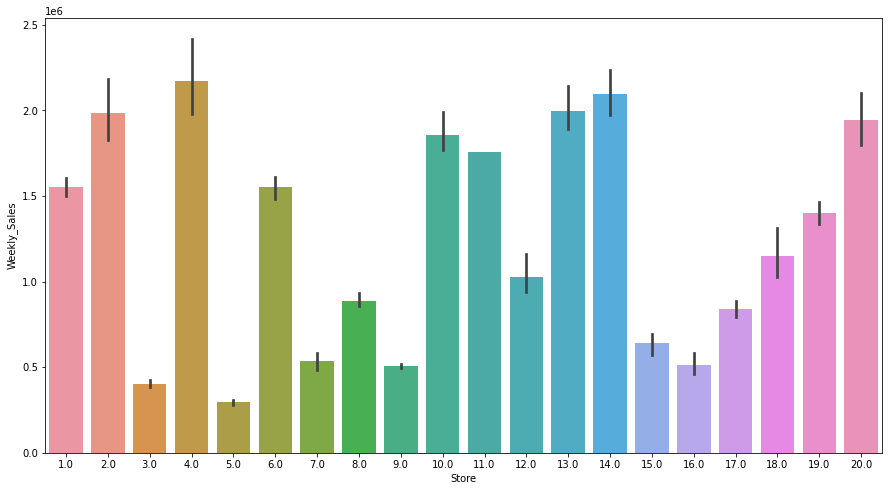

In [120]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
sns.barplot(x="Store", y="Weekly_Sales", data=walmart_df)

In [87]:
fig = px.histogram(walmart_df,
                  x="weekyear",
                  y="Weekly_Sales",
                  nbins=53)
fig.update_layout(bargap=0.2)
fig.show(renderer="iframe_connected")

<AxesSubplot:xlabel='year', ylabel='Weekly_Sales'>

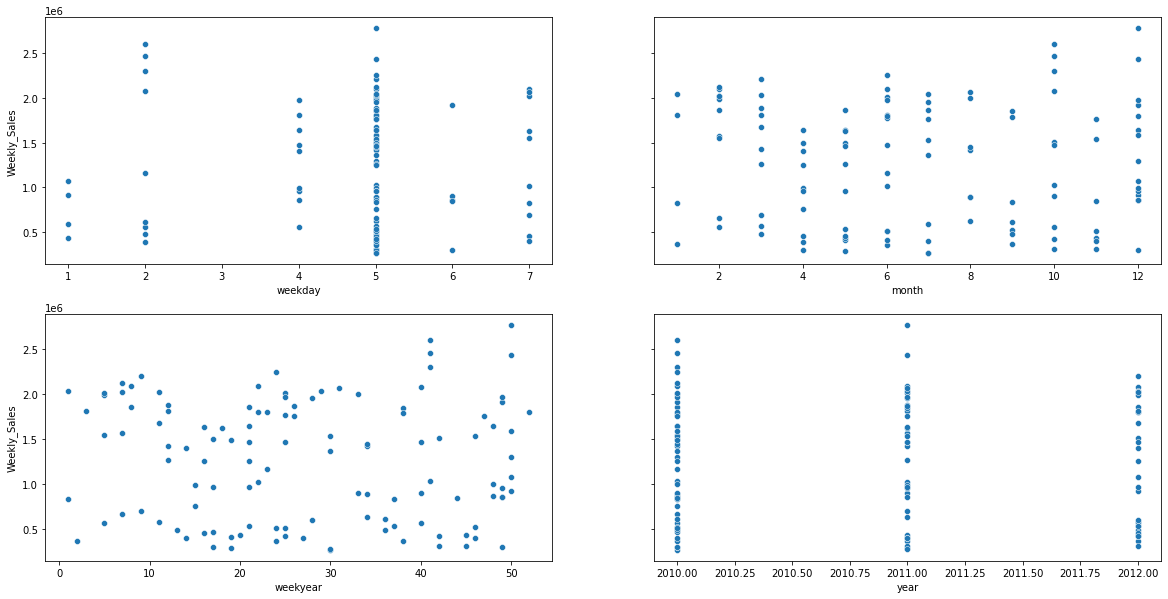

In [97]:
fig, ax = plt.subplots(2,2, figsize=(20,10), sharey=True)
sns.scatterplot(ax=ax[0,0], x="weekday", y="Weekly_Sales", data = walmart_df)
sns.scatterplot(ax=ax[0,1], x="month", y="Weekly_Sales", data = walmart_df)
sns.scatterplot(ax=ax[1,0], x="weekyear", y="Weekly_Sales", data = walmart_df)
sns.scatterplot(ax=ax[1,1], x="year", y="Weekly_Sales", data = walmart_df)

Drop lines containing invalid values or outliers : In this project, will be considered as outliers all the numeric features that don't fall within the range :  [𝑋¯−3𝜎,𝑋¯+3𝜎]
[
X
¯
−
3
σ
,
X
¯
+
3
σ
]
 . This concerns the columns : Temperature, Fuel_price, CPI and Unemployment